<a href="https://colab.research.google.com/github/Anusha0907/Capstone_EDA_project/blob/main/Anusha_EDA_Airbnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##Let's understand the data set


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
# reading the data stored in csv file
url = 'https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

airbnb_df = pd.read_csv(url)

In [3]:
# general checks to understand the data
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
# shape and size of the data
airbnb_df.shape

(48895, 16)

In [6]:
# colums with their data type and counts
airbnb_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##Data Cleansing

Now we need to check how many rows and columns the dataset is having. 
The list of column names.

In [7]:
print("Rows       :",airbnb_df.shape[0])
print("\nColumns    :",airbnb_df.shape[1])
print("\nList of columns :\n",airbnb_df.columns.tolist())


Rows       : 48895

Columns    : 16

List of columns :
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


It is also necessary to check how many unique values are present for each columns, followed by the number of missing values in the columns and the total number of missing value

In [8]:
print("\nUnique:\n",airbnb_df.nunique())
print("\nColumns with missing Value  :\n",airbnb_df.isnull().sum())
print("\nMissing Value    :",airbnb_df.isnull().sum().sum())


Unique:
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

Columns with missing Value  :
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                

Based on the above summary we have the number of rows, number of columns, features and columns with missing values. So, we can notice that 4 columns has the null values and the total missing values is 20141. Now, let's drop the unnecessary columns such as *'name'*, *'host_name'*, *'last_review'* which are irrelevent to our data analysis. *'reviews_per_month'* has the number of reviews a propety recieves in a month so we can simply replace null values with 0

In [9]:
# Dropping unnecessary columns

airbnb_df.drop(['id','name','host_name','last_review',], axis=1, inplace=True)
print(airbnb_df.head())

   host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2  

In [10]:
# Replacing nan values in review_per_month_ with 0

airbnb_df.reviews_per_month.fillna(0, inplace=True)
print(airbnb_df.isnull().sum())

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


So now we have successfully dropped the irrelevent columns and replaced the null values with 0. And we have not missed any values anymore.

In [11]:
# check the different neighbourhood_group and the types of room
print('room_type are :',airbnb_df.room_type.unique())
print('neighbourhood_groups are :',airbnb_df.neighbourhood_group.unique())

room_type are : ['Private room' 'Entire home/apt' 'Shared room']
neighbourhood_groups are : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


There are 3 different types of room available in 5 different Neighbourhood Group in this data set.

In [12]:
# First examine price column
price = pd.DataFrame(airbnb_df['price'].describe()).transpose()
price

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0


Let's examine the price data. In according to the summary statistics it is clear that the Price ranges from  0− 180. But there also exists price which has a maximum of $10000. This we cannot discard as an outlier because there are many scenarios in which price differs. The price varies on different factors which includes location,room type, neighbourhood , season etc.

In [13]:
# examine availability_365
availability_365 = pd.DataFrame(airbnb_df['availability_365'].describe()).T
availability_365

,count,mean,std,min,25%,50%,75%,max
availability_365,48895.0,112.781327,131.622289,0.0,0.0,45.0,227.0,365.0


In [14]:
# examine minimum_nights
minimum_nights = pd.DataFrame(airbnb_df['minimum_nights'].describe()).T
minimum_nights

,count,mean,std,min,25%,50%,75%,max
minimum_nights,48895.0,7.029962,20.51055,1.0,1.0,3.0,5.0,1250.0


In [15]:
# before procedding with dataset Exploration & Visualisation check the current size of data
airbnb_df.shape

(48895, 12)

## Data exploring & visualising

In [16]:
airbnb_df.host_id.value_counts().head(50)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
26377263      43
2119276       39
19303369      37
119669058     34
25237492      34
76104209      33
213781715     33
113805886     33
238321374     32
51501835      31
50760546      31
224414117     30
13347167      29
39528519      28
417504        28
226410657     27
9864136       26
230192510     25
131647128     25
221200420     23
3191545       23
242962235     23
16437254      21
252604696     20
48146336      20
7245581       19
134184451     18
3250450       18
95459395      18
216235179     17
177174475     17
201015598     17
159091490     17
9293730       16
23772724      15
Name: host_id, dtype: int64

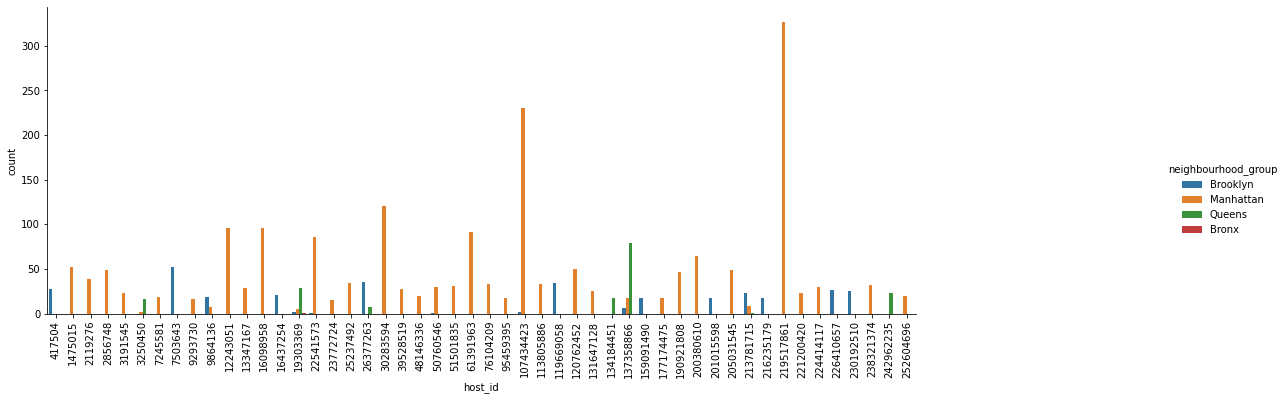

In [17]:
# create a series of top 50 hosts
host_IDs_count = airbnb_df.host_id.value_counts().head(50).reset_index().iloc[:,0]

# Make a different dataframe conataining information of only these top 50 host
Top_50_host = airbnb_df.loc[airbnb_df['host_id'].isin(host_IDs_count)]
Top_50_host
# Create a catplot to get more information about these top 50 hosts
top_host_plot=sns.catplot(x='host_id', hue='neighbourhood_group', data=Top_50_host, kind='count')
top_host_plot.set_xticklabels(rotation=90)
top_host_plot.fig.set_size_inches(20,5)

Wow, we see most of bars are orange indicating Manhattan borough. In top 20 hosts, most of them are listed in Manhattan followed by Brooklyn. 5-10 hosts from Queens. And very less from Bronx and Staten Island.

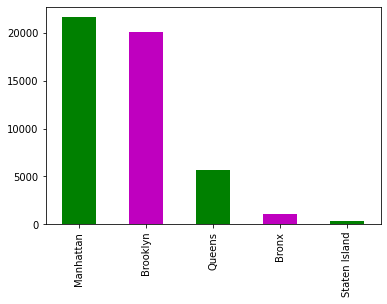

In [18]:
# Let's explore the neighbourhood group

airbnb_df['neighbourhood_group'].value_counts().plot(kind='bar',color=['g','m'])
plt.show()

Most of the properties are listed in Manhattan and Brooklyn. Though, Queens also have a significant number of listings however Bronx and Sataten Island have very low numbers.



Text(0, 0.5, 'Average price')

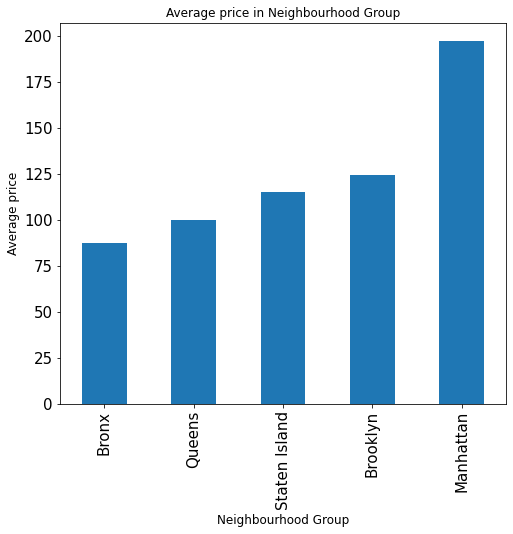

In [19]:
# Check the average prices in all the neighbourhood groups/boroughs
borough_avg_price = airbnb_df.groupby('neighbourhood_group')['price'].mean().sort_values()

borough_avg_price_plot = borough_avg_price.plot.bar(figsize = (8,7), fontsize = 15)
borough_avg_price_plot.set_title('Average price in Neighbourhood Group',fontsize = 12)
borough_avg_price_plot.set_xlabel('Neighbourhood Group',fontsize = 12)
borough_avg_price_plot.set_ylabel('Average price',fontsize = 12)


As it is well known Manhattan is the most expensive borough to live in the New York City. Whereas, Bronx and Staten Island are cheapes ones. As they are cheapest, they may be the preferencial choice for customers. We will again cross check this statement during further analysis.

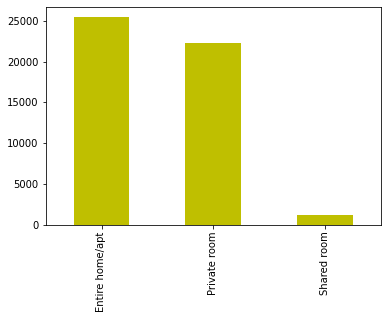

In [20]:
# room types prefered by travelers
airbnb_df['room_type'].value_counts().plot(kind='bar',color=['y'])
plt.show()

From the above plot its clear that Apartment and Private room is more than that of shared rooms. In general, Shared rooms costs less and can be very useful for travellers who moves from one city to another city quite frequently. Though the shared rooms data is less.

Top 10 most expensive locality in Airbnb listing are :


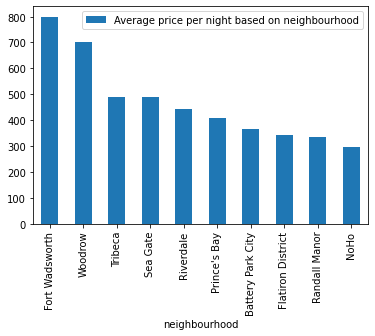

,Average price per night based on neighbourhood
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.557143
Flatiron District,341.925000
Randall Manor,336.000000


In [21]:
# find most expensive locality in neighbourhood group
print('Top 10 most expensive locality in Airbnb listing are :')

df4 = airbnb_df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price", ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(10)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)


So we have now plot the most expensive neighbourhood. This will help a traveller to choose the appropriate neighbourhood based on his budget. So according to the above plot Fort Wadsworth is the most expensive in terms of neighbourhood.

So we have now plot the least expensive neighbourhood. This will help a traveller to choose the appropriate neighbourhood based on his budget. So according to the above plot Bull's Head is the least expensive in terms of neighbourhood.

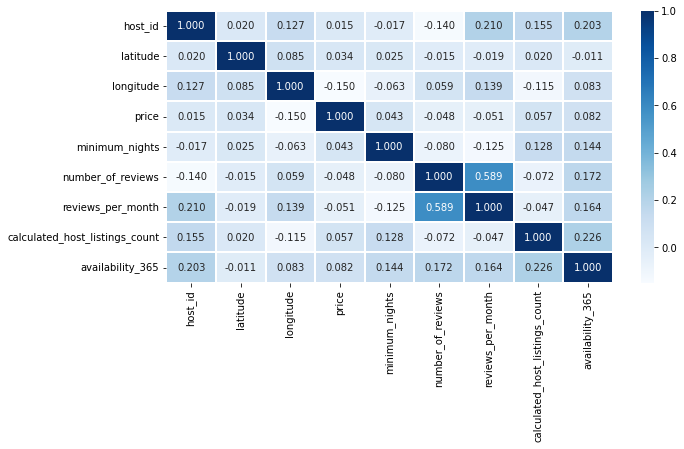

In [22]:
# Now at last correlate all columns 
## for correlation first make a correaltion statistical table. 
correlation = airbnb_df.corr()

# create a heatmap to visual comparison
plt.figure(figsize=(10,5))
sns.heatmap(airbnb_df.corr(), cmap='Blues', annot =True, fmt ='0.3f', annot_kws = { 'fontsize':10}, linewidth = 1)

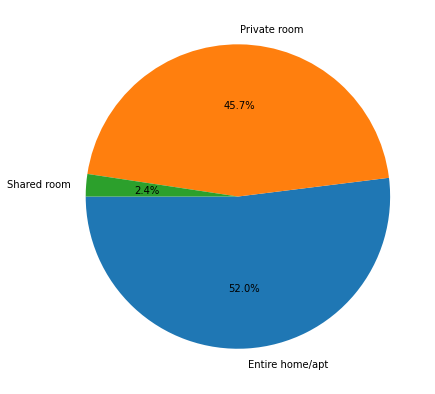

,room_type,room_type count,percentage
0,Entire home/apt,25409,51.966459
1,Private room,22326,45.661111
2,Shared room,1160,2.372431


In [23]:
# count number of properties which offers different type of room
room_types = airbnb_df.room_type.value_counts().reset_index().rename(columns = {'index':'room_type', 'room_type': 'room_type count'})

# compute numbers in percentage
room_types['percentage'] = ((room_types['room_type count'])/(room_types['room_type count'].sum()))*100
room_types.set_index('room_type')

# Creating plot pie plot
pie_chart = plt.figure(figsize =(10, 7))
pie_chart = plt.pie(room_types['room_type count'], labels =room_types.room_type,autopct = "%1.1f%%", startangle =180 )
 
# show plot
plt.show()
room_types

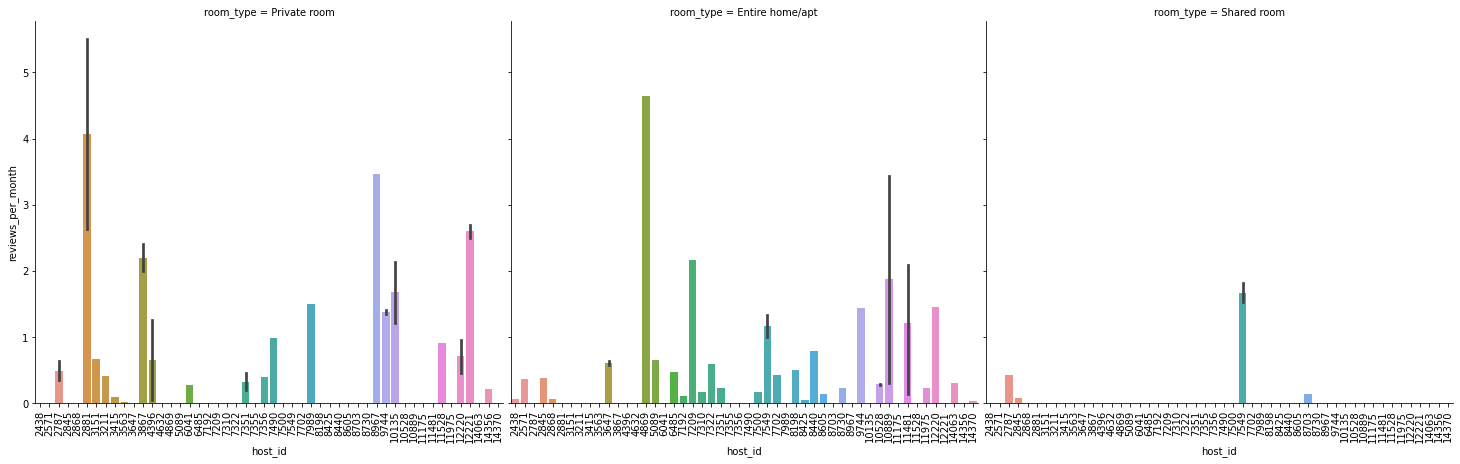

In [24]:
#  Check the review rate column
# properties having higher review rates are busiest ones.

# create a series of top 30 hosts by review rate
review_rate = airbnb_df.groupby('host_id')['reviews_per_month'].mean().head(50).reset_index()
review_rate.sort_values('reviews_per_month', ascending=False, inplace =True)
review_rate = review_rate.iloc[:,0]
# Make a different dataframe conataining information of only these top 30 host
Top_host_by_review_rate = airbnb_df.loc[airbnb_df['host_id'].isin(review_rate)]
Top_host_by_review_rate = Top_host_by_review_rate.sort_values('reviews_per_month')



#Create a catplot to get more information about these top 30 hosts
fig=sns.catplot(data=Top_host_by_review_rate, x='host_id',y='reviews_per_month',
                col= 'room_type',  kind='bar',height=2, aspect=8)
fig.set_xticklabels(rotation=90)
fig.fig.set_size_inches(20,10)


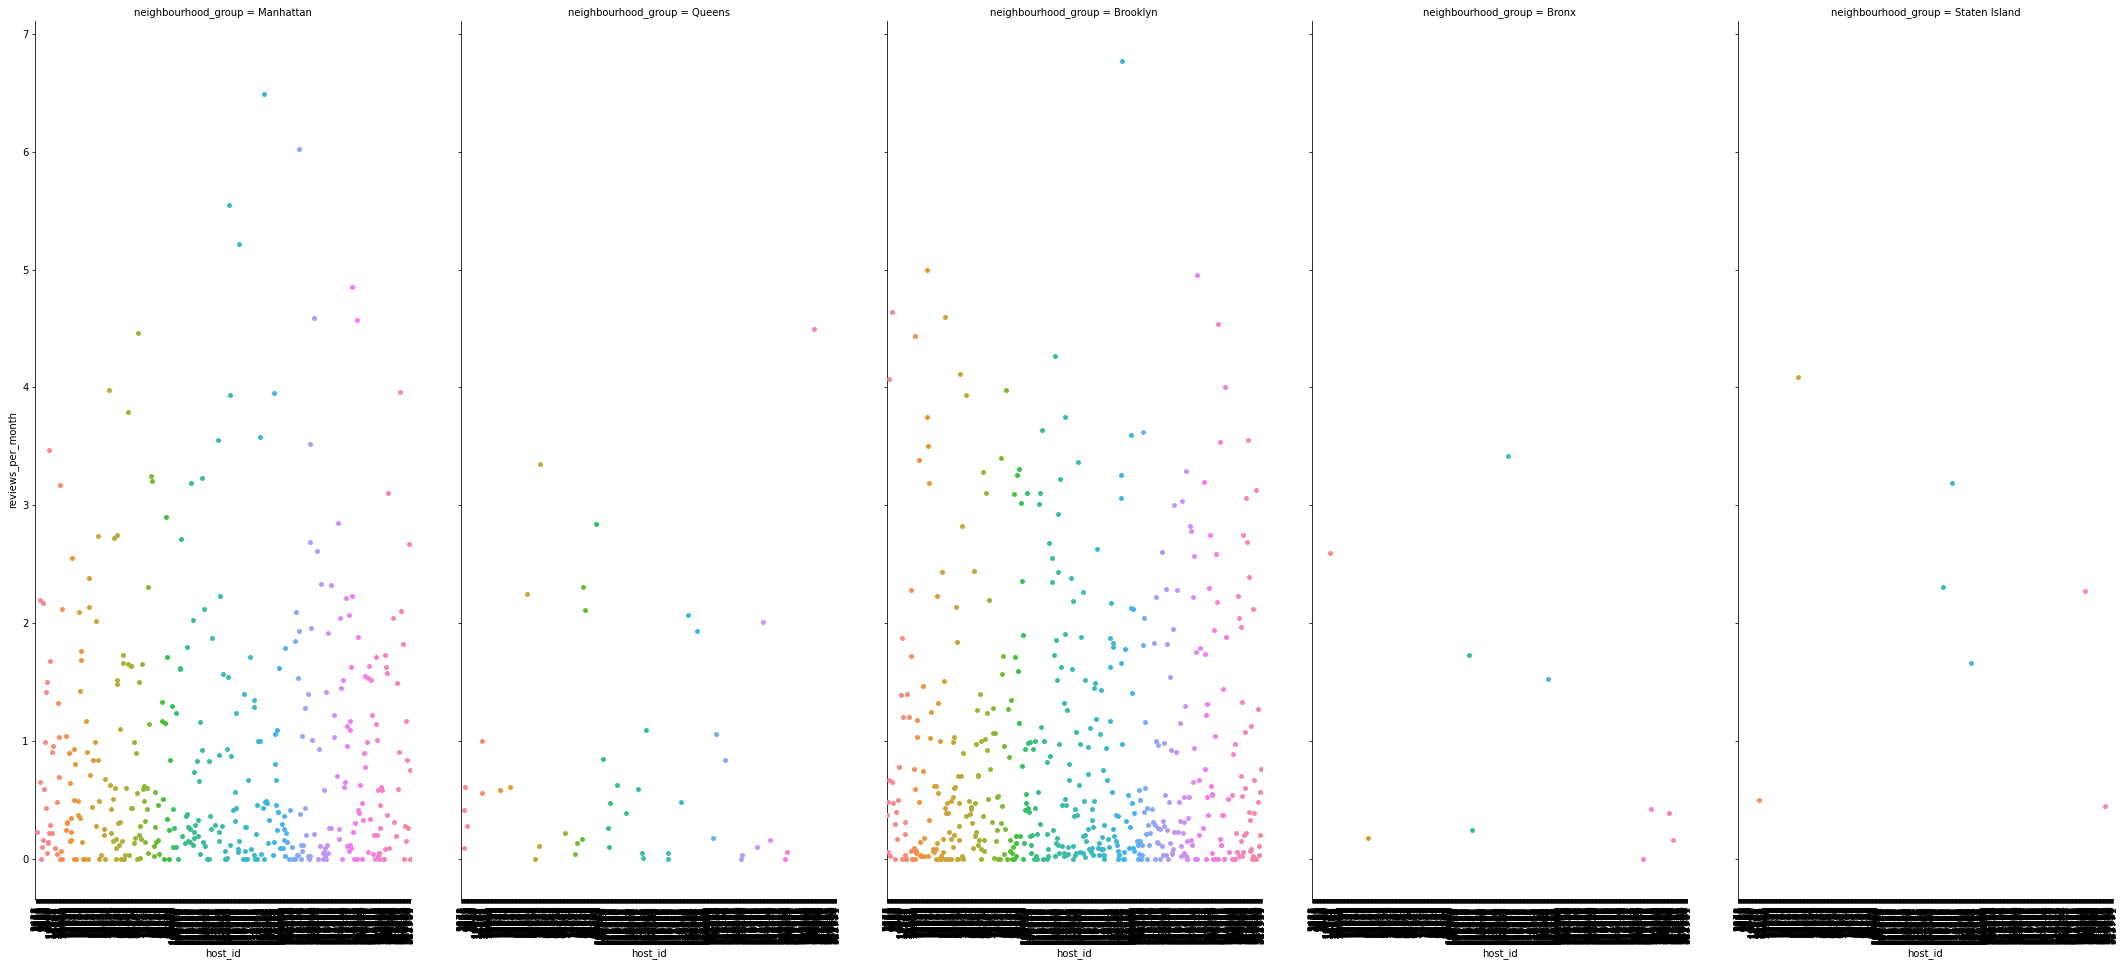

In [25]:

## create a series of top 1000 hosts by review rate
review_rate = airbnb_df.groupby('host_id')['reviews_per_month'].mean().head(1000).reset_index()
review_rate.sort_values('reviews_per_month', ascending=False, inplace =True)
review_rate = review_rate.iloc[:,0]

### Make a different dataframe conataining information of only these top 1000 host
Top_host_by_review_rate = airbnb_df.loc[airbnb_df['host_id'].isin(review_rate)]
Top_host_by_review_rate = Top_host_by_review_rate.sort_values('reviews_per_month')
'''There are multiple values of review rates pressent for some of host IDs. So we will groupby
   our dataset by host_id and neighbouhood_group and take meam of reviews_per_month'''
Top_host_by_review_rate = Top_host_by_review_rate.groupby(['host_id','neighbourhood_group']).agg({'reviews_per_month':'mean'}).reset_index().sort_values('reviews_per_month')

# Create a catplot to get the areas in which these top 1000 hosts are listed
fig=sns.catplot(data=Top_host_by_review_rate, x='host_id',y='reviews_per_month',
                 col = 'neighbourhood_group')
fig.set_xticklabels(rotation=90)
fig.fig.set_size_inches(30,15)